# Analysing Bike Sharing Demand

Bike sharing systems are new generation of traditional bike rentals where whole process from membership,
rental, and return has become automatic. Through these systems, user can easily rent a bike from a particular
location and return at another location.
- Today, there exists a great interest in bike sharing systems due to their important role in traffic, environmental,and health issues.
- Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.
- Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems.
- This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Problem Statement 
Over the years, a steady rise in bike rentals have been observed and bike-sharing program manager need to keep up with growing demand to efficiently cover area and introduce new station if necessary.Use provided dataset to help program manager to opptimize its efficiency to join more people to green transportation solution. 


# Dataset

The dataset contains hourly and daily records of bike sharing counts. Bike-sharing rental process is highly correlated with the environmental and seasonal settings. So, weather information is also recorded in the dataset.

In [2]:
import pandas as pd    # panda dataframe 
import seaborn as sns  # ploting package
%matplotlib inline      
from scipy.stats import f_oneway   #ANOVA analysis 
from scipy.stats import shapiro  # Normality test
import matplotlib.pyplot as plt
from scipy import stats   # Correlation analysis
import statsmodels.api as sm   # Modeling 
import statsmodels.formula.api as smf  # Modeling
import numpy as np

To explore the data, we first need to read the dataset and check each features properties:

In [3]:
df=pd.read_csv('bike_sharing.csv')

In [4]:
df.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


## 1. Does seasonliaty affect the total number of rentals?

<AxesSubplot:xlabel='season', ylabel='rental'>

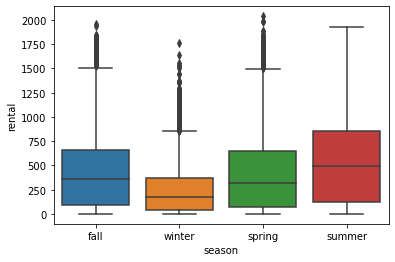

In [6]:
#is there a difference between summer and winter rentals

sns.boxplot(data=df,x='season', y='rental' )

 ## 2. Is there significant realationship between seasonality effect and the total number of hourly bike rentals at level of 95% confidence?

In [7]:
df_summer=df[df['season']=='summer']
df_winter=df[df['season']=='winter']

statistics,p_value = f_oneway(df_summer['rental'],df_winter['rental'])
print("\n \n Statistics = %.3f , p_value=%.3f" %(statistics,p_value))
if (p_value<.05):
    print('The p-value is statistically signifigant so we can reject the null and say there is a statistically signifigant difference in seasonality and number of bike rentals')
else:
    print('The p-value is above 0.05 so we have failed to reject the null hypothesis')


 
 Statistics = 1384.505 , p_value=0.000
The p-value is statistically signifigant so we can reject the null and say there is a statistically signifigant difference in seasonality and number of bike rentals


In [ ]:
df_summer=df[df['season']=='summer']
df_winter=df[df['season']=='winter']
df_spring=df[df['season']=='spring']
df_fall=df[df['season']=='fall']

statistics,p_value = f_oneway(df_summer['rental'],df_winter['rental'],df_fall['rental'],df_spring['rental'])
print("\n \n Statistics = %.3f , p_value=%.3f" %(statistics,p_value))
if (p_value<.05):
    print('The p-value is statistically signifigant so we can reject the null and say there is a statistically signifigant difference in seasonality and number of bike rentals')
else:
    print('The p-value is above 0.05 so we have failed to reject the null hypothesis')

## 3. Does the total number of bike rentals follows Normal distribution for different season at 95% confidence level?

In [8]:
#How do I do it by season? 

statistic,p_valuefall=shapiro(df['rental']) 

if (p_value<.05):
    print('The p-value is statistically signifigant so we can reject the null and say it that the distribution is not normally distributed')
else:
    print('The p-value is above 0.05 so we have failed to reject the null hypothesis')

The p-value is statistically signifigant so we can reject the null and say it that the distribution is not normally distributed


C:\Users\aidan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 4. How do temperature values change over the seasons?


<AxesSubplot:xlabel='season', ylabel='temperature'>

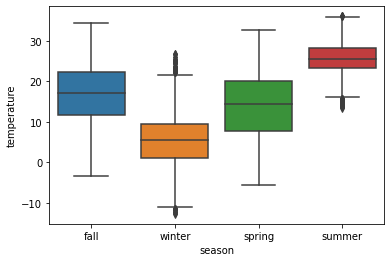

In [9]:
sns.boxplot(data=df,x='season', y='temperature' )

## 5. Is the correlation between temperature and the number of bike rentals significant at the level of 95%? 

In [10]:
statistic,p_value=stats.pearsonr(df['rental'], df['temperature'])
print(statistic,p_value)

if (p_value<0.05):
    print('There is statistically signifigant evidence of linear correlation between temperature and the number of bike rentals ')
else:
    print('There is not enough evidence to prove prove linear correlation between temperature and number of bike rentals')

0.43637556611336104 0.0
There is statistically signifigant evidence of linear correlation between temperature and the number of bike rentals 


## 6. Is there a significant difference between the total bike rental on weekends and on working days?


33.23584334468684 8.300922929252956e-09
There is a statistical difference between total bike rentals between weekends and weekdays. More bikes are used during the week.


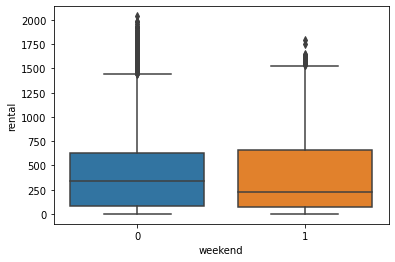

In [11]:
sns.boxplot(data=df, x="weekend", y="rental",)

df_wknd=df[df['weekend']==1]
df_wkday=df[df['weekend']==0]

statistics,p_value = f_oneway(df_wknd['rental'],df_wkday['rental'])
print (statistics,p_value)
if (p_value>0.05):
    print('There is not enough evidence to prove a statistically signifigant difference at a 5% signifigance level')
else:
    print('There is a statistical difference between total bike rentals between weekends and weekdays. More bikes are used during the week.')

## 7. To what extend hourly demand will be affected by temperature changes? What is the main driver of  number of bike rentals?

In [16]:
formula = 'rental ~  temperature'

model = smf.glm(formula=formula, data=df, family=sm.families.Poisson())

final_glm=model.fit()

print(final_glm.summary())

import math
percent_increase= [math.exp(0.0465)-1]
print(percent_increase)
print('The main driver of bike rental is the increase in temperature. As temperature rises, the number of bike rentals increases.')
print('From the GLM model, we see that the a 1 degree increase in temperature is correlated with a 4.76% increase in bike rentals on average')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17464
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7282e+06
Date:                Wed, 21 Sep 2022   Deviance:                   5.3324e+06
Time:                        19:16:25   Pearson chi2:                 5.34e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2190      0.001   5809.286      

In [13]:
formula = 'rental ~  season'

model = smf.glm(formula=formula, data=df, family=sm.families.Poisson())

final_glm=model.fit()

print(final_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17462
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1586e+06
Date:                Wed, 21 Sep 2022   Deviance:                   6.1932e+06
Time:                        19:15:48   Pearson chi2:                 6.15e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.1052      0.001  

In [14]:
formula = 'rental ~  weekend'

model = smf.glm(formula=formula, data=df, family=sm.families.Poisson())

final_glm=model.fit()

print(final_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17464
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3967e+06
Date:                Wed, 21 Sep 2022   Deviance:                   6.6694e+06
Time:                        19:15:49   Pearson chi2:                 6.72e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5240
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0668      0.000   1.41e+04      0.0

In [ ]:
#The day and temperature are both main drivers of bike rentals. As temperatures rise, bike demand increases signifigantly.
#This is also shown in the GLM done on seasons where demand falls between fall and winter while it increases between fall and summer.

## 8. What is your suggestions and recommendations to enhance the effectiveness of bike rental business ?

In [ ]:
#Ensure maintenance and upkeep of bikes is done during the winter time to reduce the number of bikes needed.
#We know that a large portion of demand is related to the temperature outside, so by planning maintenance around changes in temp
#and the weekend, we can minimize downtime of bike and maximize the availability of bike on peak days.